In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
df=pd.read_csv('medical_examination.csv')

In [6]:
df.columns=['id','Age',

'Height',

'Weight',

'Gender',

'ap_lo',

'ap_hi',

'Cholesterol',

'Glucose',

'Smoking',

'Alcohol intake',

'Physical activity',

'cardio']

In [7]:
df['overweight'] = (df['Weight'] / (df['Height'] ** 2) > 25).astype(int)

In [8]:
df['Glucose'] = (df['Glucose'] > 1).astype(int)


In [9]:
df['Cholesterol'] = (df['Cholesterol'] > 1).astype(int)


In [10]:
def draw_cat_plot(df):
    cplt=sns.catplot(df)

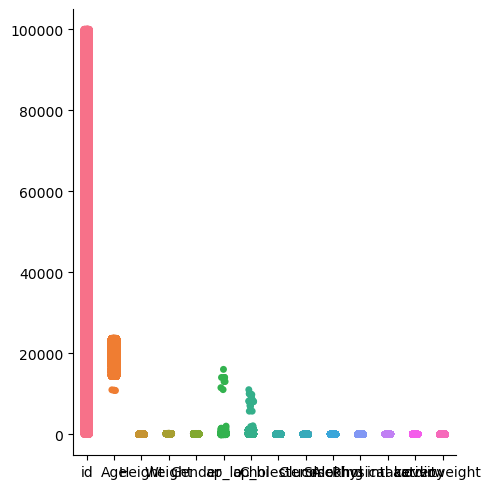

In [11]:
draw_cat_plot(df)

In [12]:
df_cat = pd.melt(
    df,
    id_vars=['cardio'],
    value_vars=['Cholesterol', 'Glucose', 'Smoking', 'Alcohol intake', 'Physical activity', 'overweight'],
    var_name='variable',
    value_name='value'
)


In [13]:
catgpd=df_cat.groupby(['cardio','variable','value']).size().reset_index(name='total_times')


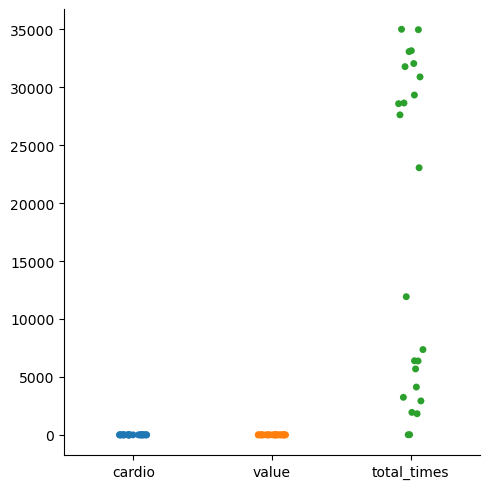

In [14]:
fig=draw_cat_plot(catgpd)

In [15]:
df_heat=(df['ap_lo'] <= df['ap_hi'])&(df['Height'] >= df['Height'].quantile(0.025))&(df['Height'] <= df['Height'].quantile(0.975))&(df['Weight'] >= df['Weight'].quantile(0.025))&(df['Weight'] <= df['Weight'].quantile(0.975))

In [16]:

corr_matrix = df[df_heat].corr()



In [17]:
mask=np.triu(np.ones_like(corr_matrix,dtype=bool))

In [18]:
def draw_heat_map(df):
    plt.figure(figsize=(10,8))
    sns.heatmap(df,
               linewidths=1,
               cmap='coolwarm',
               mask=mask,
               annot=True,
               fmt='.1f'
               )
    plt.show()


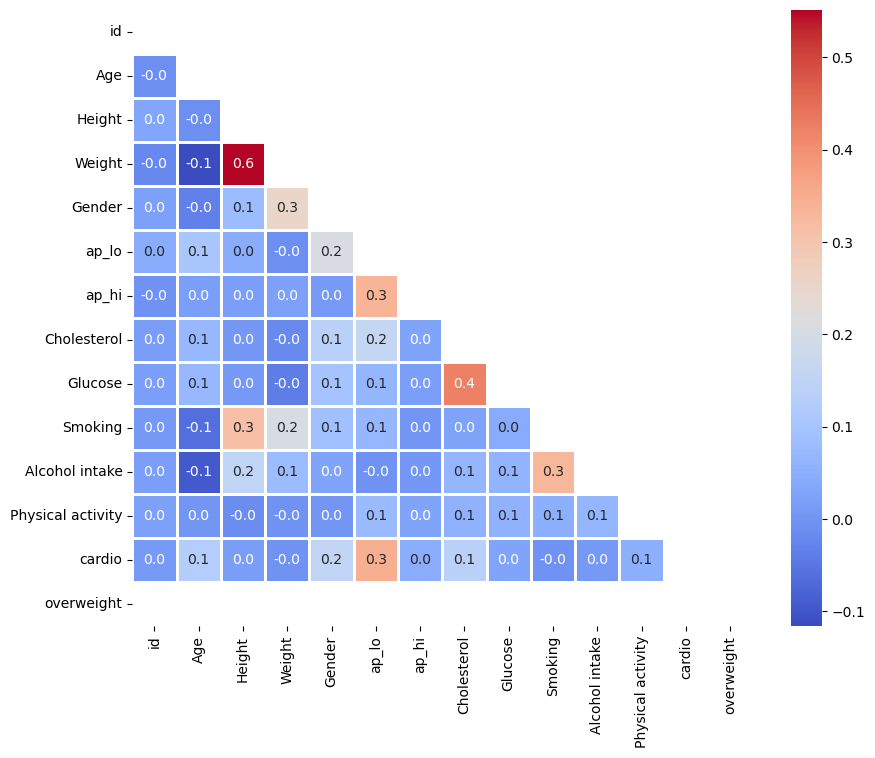

In [19]:
draw_heat_map(corr_matrix)